1. Store ABC wants to cluster its customers into 4 segments using the spend and total_purchases data. Perform k-means clustering by selecting the appropriate number of clusters for data. Use appropriate visualizations to show the clustering. (6 points)

spend = [103, 341, 363, 124, 107, 414, 359, 397, 359, 395, 446, 365, 125, 236, 264, 149, 132, 155, 208, 400, 455, 463, 122, 371, 109, 132, 211, 468, 275, 460] 

total_purchases = [122, 405, 428, 118, 178, 126, 162, 462, 372, 392, 297, 439, 487, 193, 477, 394, 327, 376, 285, 390, 353, 264, 113, 379, 485, 312, 349, 398, 375, 401].

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

df = pd.DataFrame({ 'spend' : [103, 341, 363, 124, 107, 414, 359, 397, 359, 395, 446, 365, 125, 236, 264, 149, 132, 155, 208, 400, 455, 463, 122, 371, 109, 132, 211, 468, 275, 460],
                    'total_purchases' : [122, 405, 428, 118, 178, 126, 162, 462, 372, 392, 297, 439, 487, 193, 477, 394, 327, 376, 285, 390, 353, 264, 113, 379, 485, 312, 349, 398, 375, 401]})

df.head

<bound method NDFrame.head of     spend  total_purchases
0     103              122
1     341              405
2     363              428
3     124              118
4     107              178
5     414              126
6     359              162
7     397              462
8     359              372
9     395              392
10    446              297
11    365              439
12    125              487
13    236              193
14    264              477
15    149              394
16    132              327
17    155              376
18    208              285
19    400              390
20    455              353
21    463              264
22    122              113
23    371              379
24    109              485
25    132              312
26    211              349
27    468              398
28    275              375
29    460              401>

In [90]:
df = df.loc[:, ['spend', 'total_purchases']]
df.head(2)

,spend,total_purchases
0,103,122
1,341,405


In [91]:
X = df.values

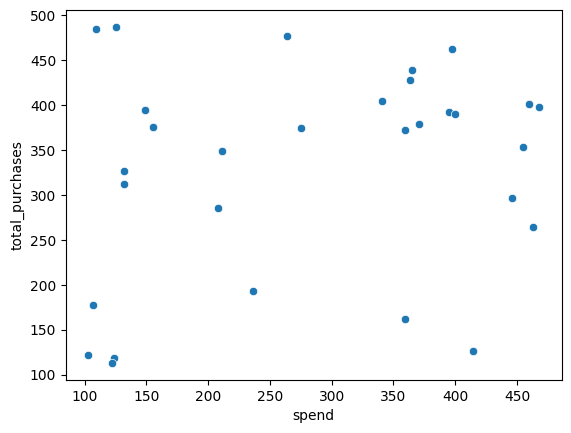

In [92]:
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:, 1])
plt.xlabel('spend')
plt.ylabel('total_purchases')
plt.show()

In [93]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    return sum

In [94]:
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = df.sample(n=k).values
    while diff:
        # for each observation
        for i, row in enumerate(X):
            mn_dist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [95]:
k = 4
centroids, cluster = kmeans(X, k)
pred_labels = KMeans(n_clusters=4).fit_predict(X)
print(pred_labels)

[0 2 2 0 0 1 1 2 2 2 1 2 3 0 3 3 3 3 3 2 2 1 0 2 3 3 3 2 3 2]


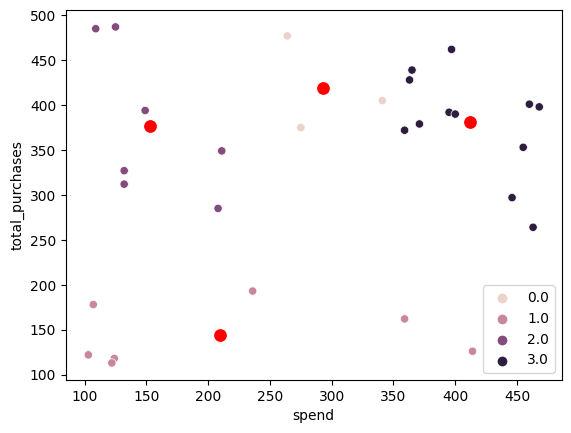

In [96]:
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=cluster)
sns.scatterplot(x=centroids[:,0], y=centroids[:, 1], s=100, color='r')
plt.xlabel('spend')
plt.ylabel('total_purchases')
plt.show()

Q2. The actual labels for each data point from Q1 are as follows:

true_labels=[0, 2, 1, 0, 1, 3, 3, 2, 1, 1, 3, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 3, 0, 1, 2, 2, 2, 3, 2, 1]

Write a python program to calculate the accuracy of your clustering. Also calculate its Homogeneity Score, V Measure Score, and Adjusted Rand Score. (4 points)

In [97]:
from sklearn.metrics import homogeneity_score, adjusted_rand_score, v_measure_score, accuracy_score

true_labels=[0, 2, 1, 0, 1, 3, 3, 2, 1, 1, 3, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 3, 0, 1, 2, 2, 2, 3, 2, 1]

accuracy_score(true_labels, pred_labels)
print("Accuracy_Score =", accuracy_score(true_labels, pred_labels))

homogeneity_score(true_labels, pred_labels)
print("Homogeneity Score =", homogeneity_score(true_labels, pred_labels))

v_measure_score(true_labels, pred_labels)
print("V Measure Score =", v_measure_score(true_labels, pred_labels))

adjusted_rand_score(true_labels, pred_labels)
print("Adjusted Rand Score =", adjusted_rand_score(true_labels, pred_labels))

Accuracy_Score = 0.23333333333333334
Homogeneity Score = 0.6147483529946379
V Measure Score = 0.6182419689756983
Adjusted Rand Score = 0.491725768321513


Q3. For the house_prices_data.csv Download house_prices_data.csv dataset consider price as a dependent variable and sqft_living, sqft_lot, sqft_basement, num_bathrooms, and num_bedrooms as independent variables. (Use functions from sklearn package) (10 points)
    i) Split the data into a 25% test set and a 75% training set. 
    ii) Build a linear regression model on the training set.
    iii) Predict the house prices for the test set.
    iv) Plot the actual Vs predicted values using scikitplot.
    v) Calculate the RMSE and R-squared value of your predictions.

In [98]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
  
House_data = pd.read_csv('house_prices_data.csv')


X = House_data[['sqft_living','sqft_lot','sqft_basement','num_bathrooms','num_bedrooms']]
y = House_data['price']
  
# Spliting the data into a 25% test set and a 75% training set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.25, random_state=100)

# Building a linear regression model on the training set
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  33227.09508440783
Coefficients:


[('sqft_living', 429.9626026626347),
 ('sqft_lot', -1.6084302892347893),
 ('sqft_basement', -259.78375841063473),
 ('num_bathrooms', 1695.8702859340415),
 ('num_bedrooms', -57145.71487450477)]

In [99]:
# Predicting the house prices for the test set
y_pred_mlr= mlr.predict(X_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 482530.55960264  400223.95041099  686368.86737578  500738.28161858
  404691.39143373  464301.19049687  810860.51244443 1887448.95910638
  524930.40135145  497030.67522724  757538.60574076  979402.46067961
  291899.84955484  290385.63332565  427693.77086966  394258.02741204
  882017.75647983  333944.84388404  488531.19005747 1822430.65182365
  423597.41979659  507060.40123953  365375.41327074  609445.63954554
  489219.94452763  551915.70886584  469548.1172963   775536.60367861
  694931.72938284  463312.75395749 1069603.31570777  710412.86595321
  401127.4167861  1347856.4137735   367773.32821038 1418309.43896226
 1672359.87887204  656295.35204387  416643.47782415  433403.93935378
  413929.36216865  362936.36411043  484386.28434686  764532.01229028
  328076.02101868 1785095.61168639  461241.74935676  471305.64810114
  354614.74262726  811404.85764619  328315.60155125  446801.02788489
  471209.49536061  726579.5291229   766845.80884432  788568.51823459
  404272.

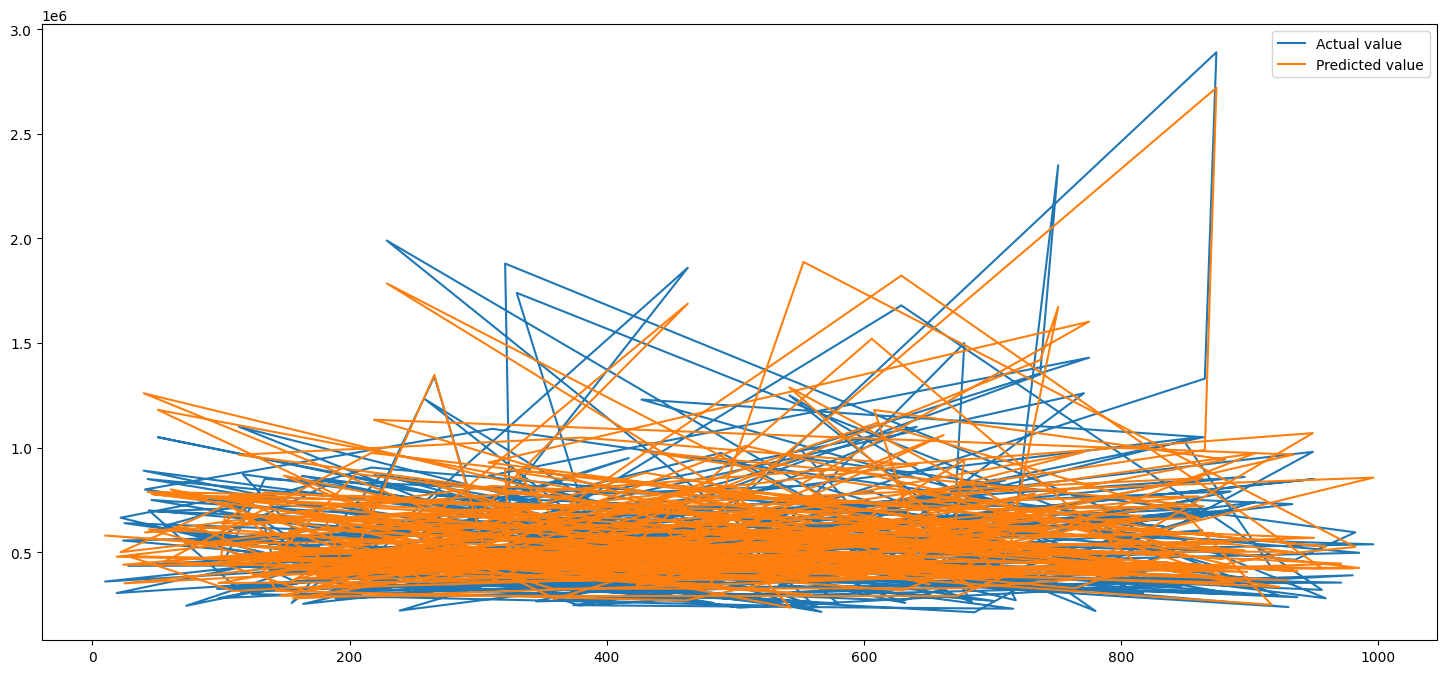

In [100]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.plot(kind='line',figsize=(18,8))
plt.show()


In [101]:
actual = y_test
Predicted = y_pred_mlr

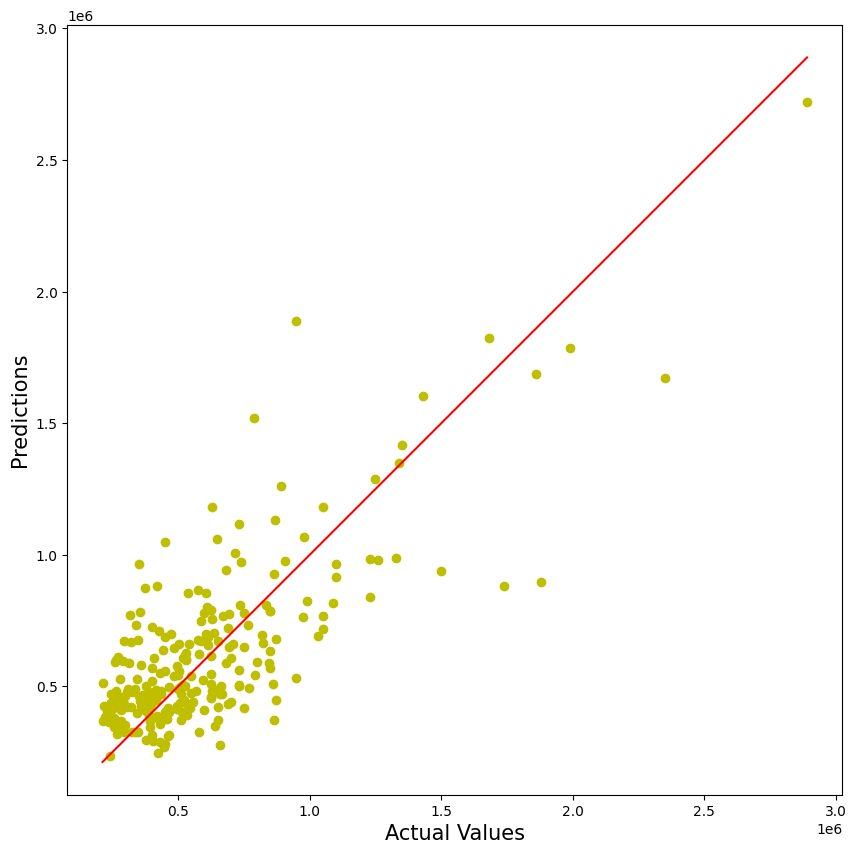

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(actual, Predicted, c = 'y')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(Predicted), max(actual))
p2 = min(min(Predicted), min(actual))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [103]:
# Calculating the RMSE and R-squared value of your predictions.
from sklearn import metrics
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('Root Mean Square Error:', rootMeanSqErr)
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))

Root Mean Square Error: 231942.18450202953
R squared: 53.98
